# RADMAP Package Tutorials - Clutter
--------

This notebook will show examples of how to use the RADMAP (Radar Modeling, Antenna, and Performance (Python)) package. This should allow you to gain experience with Python, Jupyter Notebooks, and radar theory.

Import required modules for this example.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from antenna import Antenna, Linear, Planar, taylor
from waveform import TxWaveform
from general import rad2deg, power2dB
from clutter import Clutter
from performance import Radar
from detection import SW0_SW5
from target import Target
from processors import Doppler

---------
Example 1
---------
This is based on Homework 8 from EE725.

The radar in question operates has a Tx/Rx antenna with a 2 deg x 2 deg beamwidth and mean sidelobe level of -30 dB. The antenna sits a height of 5 m above the ground. The radar uses a 1 usec PW / 333.3 usec PRI and operates at 10 GHz.

Plot the clutter response for a -20 dBsm target out to 50 km range for the cases when the antenna is pointed at the elevation angles of [0, 0.5, 1] deg.

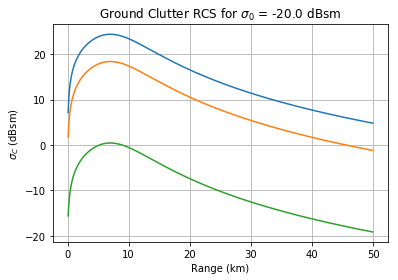

In [2]:
# Define Antenna
Ant1 = Antenna(f=10e9, BW=(2, 2), h=5, SL=-30)

# Define Waveforms to be analyzed
Wfm1 = TxWaveform(f=10e9, tauP=1e-6, T=1/3000, name='1us Unmod')

# Loop over steering angels and plot clutter
# Steer to 0 deg, +1/2 beamwidth, and +1 beamwidth
steering_angles = np.array([0, 0.5, 1])*rad2deg(Ant1.get_BW()[1])
clutter = []
for el in steering_angles:

    # Steer beam
    Ant1.steer(el0=el)

    # Define clutter model
    clutter.append(Clutter(Ant1, Wfm1, sigma0=
                           -20))

    # Plot clutter power
    clutter[-1].plot_sigmaC()

---------
Example 2
---------
The radar in question operates has a Tx/Rx antenna with a 2 deg x 2 deg beamwidth and mean sidelobe level of -30 dB. The antenna sits a height of 5 m above the ground. The radar uses a 10 usec PW / 400 usec PRI and operates at 8 GHz.

Plot the clutter PDF for a $\sigma_V=0.22$ in a non-scanning case and a scanning antenna with a scan period of 2 sec.

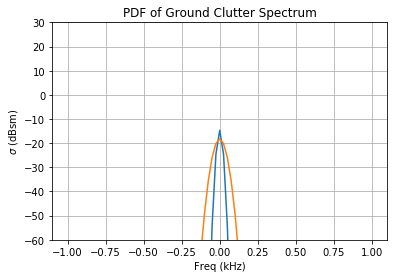

In [3]:
# Set up antenna and waveform to use in clutter
ant1 = Antenna(8e9, BW=(2, 2), h=5)
wfm1 = TxWaveform(8e9, tauP=10e-6, T=400e-6)

# Calcualte model for non scanning
cl1 = Clutter(ant1, wfm1, sigmaV=0.22, Tscan=0)
cl1.plot_pdf()

# Calculate mode for scanning
cl2 = Clutter(ant1, wfm1, sigmaV=0.22, Tscan=2)
cl2.plot_pdf()

---------
Example 3
---------
The radar in question operates has a Tx/Rx antenna with a 2 deg x 2 deg beamwidth and mean sidelobe level of -30 dB. The antenna sits a height of 5 m above the ground. The radar uses a 4 usec PW / 400 usec PRI / 1 MHz LFM and operates at 8 GHz. The radar has a transmit power of 50 kW, receiver noise figure of 4 dB, losses of 10 dB, and a system noise temperature of 1000 K.

The clutter is defined by $\sigma_0=-20 dB$, $\sigma_V=0.22$ dB, and $T_{scan}=2$ s.

Plot the SNR, CNR, and SIR curves for a 6 dB target at 150 m vertical position out to 60 km.

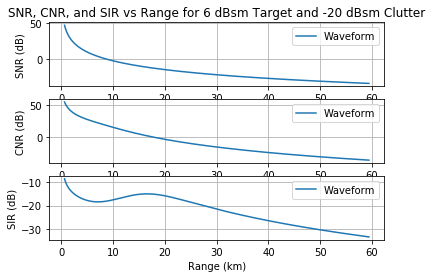

In [4]:
# Set up antenna and waveform to use in clutter
ant = Antenna(8e9, BW=(2, 2), h=5, SL=-30)
wfm = TxWaveform(8e9, tauP=4e-6, T=400e-6, BW=1e6, mod='LFM')

# Calcualte model for non scanning
clutter = Clutter(ant, wfm, hT=150, sigma0=-20, sigmaV=0.22, Tscan=2)

# Define Radar
radar2 = Radar(Pt=power2dB(50e3), Ant=ant, TxWfm=wfm, Fn=4, L=10, Ts=1000)
radar2.set_target(SW0_SW5(6))
radar2.set_clutter(clutter)
radar2.plot_snr_cnr_sir()

---------
Example 4
---------
The radar in question operates has a Tx/Rx antenna with a 2 deg x 2 deg beamwidth and mean sidelobe level of -30 dB. The antenna sits a height of 5 m above the ground. The radar uses a 4 usec PW / 400 usec PRI / 1 MHz LFM and operates at 8 GHz. The radar has a transmit power of 50 kW, receiver noise figure of 4 dB, losses of 10 dB, and a system noise temperature of 1000 K.

The clutter is defined by $\sigma_0=-20 dB$, $\sigma_V=0.22$ dB, and $T_{scan}=2$ s.

Plot the SNR, CNR, and SIR curves for a 6 dB target at 150 m vertical position out to 60 km.

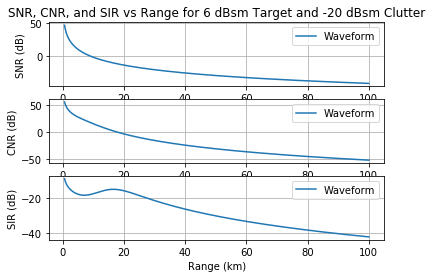

In [5]:
# Set up antenna and waveform to use in clutter
ant = Antenna(8e9, BW=(2, 2), h=5, SL=-30, el0=1)
wfm = TxWaveform(8e9, tauP=4e-6, T=50e-3, BW=1e6, mod='LFM')

# Calcualte model for non scanning
clutter = Clutter(ant, wfm, sigma0=-20, sigmaV=0.22, Tscan=2)

# Define radar model
radar3 = Radar(Pt=47, Ant=ant, TxWfm=wfm, Fn=4, L=10, Ts=1000)
radar3.set_target(SW0_SW5(6))
radar3.set_clutter(clutter)
radar3.plot_snr_cnr_sir()

---------
Example 4
---------
The radar in question operates has a Tx/Rx antenna with a 2 deg x 2 deg beamwidth and mean sidelobe level of -30 dB. The antenna sits a height of 3 m above the ground and is pointed at an elevation angle of 1 deg. The radar uses a 1 usec PW / 100 kHz PRF / 1 MHz LFM, operates at 8 GHz, and uses Doppler processing with a 7 msec CPI. The radar has a transmit power of 10 kW, receiver noise figure of 4 dB, losses of 10 dB, and a system noise temperature of 1500 K, -130 dB phase noise.

The clutter is defined by $\sigma_0=-20 dB$, $\sigma_V=0.22$ dB, and $T_{scan}=2$ s.

The target is a -10 dB target inbound at 150 m/s.

Plot the SNR, CNR, and SIR curves the target.

C:\Users\Edwards\projects\radmap\processors.py:163: RuntimeWarning: overflow encountered in power
  self.HH.append(((beta/betach)**(2*n))/(1+(beta/betach)**(2*n)))
C:\Users\Edwards\projects\radmap\processors.py:163: RuntimeWarning: invalid value encountered in true_divide
  self.HH.append(((beta/betach)**(2*n))/(1+(beta/betach)**(2*n)))


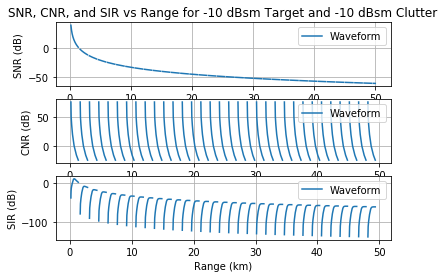

In [6]:
# Set up antenna and waveform to use in clutter
ant = Antenna(8e9, BW=(2, 2), h=3, SL=-30, el0=1)
wfm = TxWaveform(8e9, tauP=1e-6, PRF=100e3, BW=1e6, mod='LFM', CPI=7e-3)

# Calcualte model for non scanning
clutter = Clutter(ant, wfm, sigma0=-10, sigmaV=0.22, Tscan=0)

# Define radar model
radar3 = Radar(Pt=10e3, power_dB=False, Ant=ant, TxWfm=wfm, Fn=4, L=10,
               Ts=1500, phi=-130, Rmax=50e3, Rres=10)
radar3.set_target(Target(dR=-150, sigma=SW0_SW5(-10)))
radar3.set_clutter(clutter)
radar3.plot_snr_cnr_sir()

dopproc = Doppler(radar3, dRmin=30)